<H1>Dataset Loading and Interaction Extraction</h1>

In [10]:
class Sentence:
    def __init__(self):
        self.text = ""
        self.proteins = []
        self.interactions = []
        self.reconstructedText = ""
        self.words = []
        self.valid = False

    def show(self):
        print(self.text)
        print(self.proteins)
        if len(self.interactions):
            for i in self.interactions:
                print(i)
        print()
        
        
    def processText(self):
        #self.text = self.text.replace("_/_","_ _")
        #self.text = self.text.replace("_:_","_ _")
        #self.text = self.text.replace("_-_","_ _")
        self.text = re.sub("(\_[^_]_)", "_ _", self.text)#regexp to remove things like _:_
        self.text = self.text.replace("(_","_")
        self.text = self.text.replace("_)","_")
    
    def checkValidity(self):
        count = 0
        for w in range(len(self.words)):
            if "__" in self.words[w]:
                count = count +1
        
        if count == len(self.proteins):
            self.valid = True
            #print(self.valid)
        
    
    def reconstructText(self):
        self.words = self.text.split(" ")
        self.checkValidity()
        #print(self.words)
        if self.valid:
            p=0
            for w in range(len(self.words)):
                if "__" in self.words[w]:
                    self.words[w] = self.proteins[p]
                    #self.words[w] = "PROTEIN"+str(p)
                    p=p+1
            #print(self.words)
            #print()
        
    def reassembleSentence(self):
        print(" ".join(self.words))
        
    def fullProcess(self):
        self.processText()
        self.reconstructText()
        

In [11]:
import pickle

with open('datasetTrain.pkl', 'rb') as input1:
    trainSetRaw = pickle.load(input1)
    
with open('datasetTest.pkl', 'rb') as input2:    
    testSetRaw = pickle.load(input2)
    
try:
    print(len(trainSetRaw))
    print(len(testSetRaw))
except NameError:
    print("nope")   

2245
529


In [12]:
def findMaxWords(inputList):
    maxwords = -1 
    for i in inputList:
        if len(i.words)>maxwords:
            maxwords = len(i.words)
    print(maxwords)
    

In [13]:
findMaxWords(trainSetRaw)
findMaxWords(testSetRaw)

93
74


<h1>Maximum Words In Sentence</h1>

We start out with
2245 training examples
529 test examples

mean 24.980894015861573
std 10.856406734698178
80 words: 2770
70 words: 2766
60 words: 2751
50 words: 2697
48 words: 2674
40 words: 2544
30 words: 2086

Selecting for under 48 words we are left with
2186 training examples
511 test examples


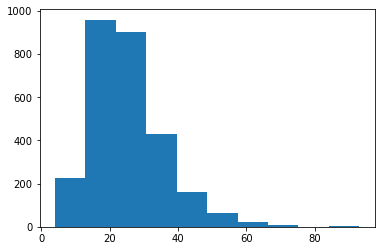

In [14]:
print("We start out with")

print(len(trainSetRaw),"training examples")
print(len(testSetRaw),"test examples")

print()

allSet = [len(x.words) for x in trainSetRaw+testSetRaw]

from matplotlib import pyplot as plt 
import numpy as np  

print("mean",np.mean(allSet))

print("std",np.std(allSet))

plt.hist(allSet)



selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=80 ]

print("80 words:",len(selectedSet))


selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=70 ]

print("70 words:",len(selectedSet))

selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=60 ]

print("60 words:",len(selectedSet))


selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=50 ]

print("50 words:",len(selectedSet))

selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=48 ]

print("48 words:",len(selectedSet))


selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=40 ]

print("40 words:",len(selectedSet))

selectedSet = [x for x in trainSetRaw+testSetRaw if len(x.words)<=30 ]

print("30 words:",len(selectedSet))


#HERE
maxSentenceWords = 50

trainSetRaw = [x for x in trainSetRaw if len(x.words)<=maxSentenceWords]
testSetRaw = [x for x in testSetRaw if len(x.words)<=maxSentenceWords]


print()
print("Selecting for under 48 words we are left with")
print(len(trainSetRaw),"training examples")
print(len(testSetRaw),"test examples")

In [15]:
print(trainSetRaw[0])
print()

print(trainSetRaw[0].text)
print()

print(trainSetRaw[0].words)
print()

print(trainSetRaw[0].proteins)



print(len('protein0'))


Cytokines measurements during _________ treatment showed a trend to decreasing levels of ____ at 4, 12, and 24 weeks.

['Cytokines', 'measurements', 'during', 'PROTEIN0', 'treatment', 'showed', 'a', 'trend', 'to', 'decreasing', 'levels', 'of', 'PROTEIN1', 'at', '4,', '12,', 'and', '24', 'weeks.']

['PROTEIN0', 'PROTEIN1']
8


In [16]:
import string
string.ascii_letters

import random
random.choice(string.ascii_letters)

def genRandomWord():
    word = ''
    for letter in range(random.randint(3,9)):
        word+=random.choice(string.ascii_letters)
        
    return word
        

for i,v in enumerate(range(10)):
    print(i,genRandomWord())

0 iOgt
1 kVARpjjZ
2 uhMezxq
3 bWo
4 TsUXcOeuU
5 NScqtPe
6 DAoGlte
7 HzGtAO
8 nfbeuJuTr
9 IvBaA


In [17]:
import re

re.sub('PROTEIN[0-9]',genRandomWord(),'PROTEINA PROTEIN1 PROTEIN2 is a sentence')




'PROTEINA hGhQJw hGhQJw is a sentence'

In [18]:
with open ("protein_list.txt", "r", encoding="utf8") as myfile:
    lines=myfile.readlines()
    myfile.close()

proteins = [l.rstrip() for l in lines]    
print(len(proteins),"proteins imported")


import random

def genRandomProtein():
    return random.choice(proteins)
        

for i,v in enumerate(range(10)):
    print(i,genRandomProtein())

96355 proteins imported
0 deha2f16764p
1 gk21808
2 pc20g11690
3 hsc70-5,mthsc70-2
4 yiga
5 udp-glucose-6-dehydrogenase
6 adl230cp
7 gluconolaconase
8 aael002472-pa
9 fibrosin


In [19]:
for i in range(10):
    print('PROTEIN'+str(i))

PROTEIN0
PROTEIN1
PROTEIN2
PROTEIN3
PROTEIN4
PROTEIN5
PROTEIN6
PROTEIN7
PROTEIN8
PROTEIN9


In [20]:
trainSet = []
trainLabel = []

for example in trainSetRaw:
    #print(example.words)
    for interaction in example.interactions:
        sentence =" ".join(example.words)
        
        sentence = sentence.lower()
        
        #print(sentence)
        #print()
        
        if interaction[2] == "True":
            trainLabel = trainLabel + [1]
            #print("HIT")
        else:
            trainLabel = trainLabel + [0]
            #print("MISS")
        
        sentence = sentence.replace(interaction[0].lower(),'PROTEINA')
        sentence = sentence.replace(interaction[1].lower(),'PROTEINB')
        for i in range(10):
            sentence = sentence.replace(('PROTEIN'+str(i)).lower(),genRandomProtein())
        #sentence = re.sub('PROTEIN[0-9]',genRandomWord(),sentence)
        
        #print(sentence)
        #print()
        #print()
        
        trainSet = trainSet + [sentence]    
            
    #print()
    
    
print(len(trainSet))
print(len(trainLabel))

10394
10394


In [21]:
testSet = []
testLabel = []

for example in testSetRaw:
    #print(example.words)
    for interaction in example.interactions:
        sentence =" ".join(example.words)
        
        sentence = sentence.lower()
        
        #print(sentence)
        #print()
        
        if interaction[2] == "True":
            testLabel = testLabel + [1]
            #print("HIT")
        else:
            testLabel = testLabel + [0]
            #print("MISS")
        
        sentence = sentence.replace(interaction[0].lower(),'PROTEINA')
        sentence = sentence.replace(interaction[1].lower(),'PROTEINB')
        for i in range(10):
            sentence = sentence.replace(('PROTEIN'+str(i)).lower(),genRandomProtein())
        
        #print(sentence)
        #print()
        #print()
        
        testSet = testSet + [sentence]    
            
    #print()
    
    
print(len(testSet))
print(len(testLabel))

2336
2336


In [22]:
for t in trainSet:
    print(t)
    print()

cytokines measurements during PROTEINA treatment showed a trend to decreasing levels of PROTEINB at 4, 12, and 24 weeks.

levels of PROTEINA were slightly increased following PROTEINB treatment (p = 0.09).

this study describes the distributions of PROTEINA as well as mrnas for PROTEINB fig00640962 collagen types ii fatc and iii gl10497 in a growing "cartilage cap" of osteochondroma.

this study describes the distributions of PROTEINA as well as mrnas for gl24328 PROTEINB collagen types ii gh14701 and iii si:rp71-1f1.6 in a growing "cartilage cap" of osteochondroma.

this study describes the distributions of PROTEINA as well as mrnas for cg2901 pc12g02660 collagen types ii PROTEINB and iii ael060cp in a growing "cartilage cap" of osteochondroma.

this study describes the distributions of PROTEINA as well as mrnas for si:ch73-170d6.2 yeib collagen types ii si:dkey-38l22.2 and iii PROTEINB in a growing "cartilage cap" of osteochondroma.

this study describes the distributions of monoxyge

coexpression of adl113cp with PROTEINA in the baculovirus expression system resulted in the phosphorylation of PROTEINB on tyrosine residues.

further, PROTEINA and PROTEINB coprecipitated each other in a variety of detergents, including nonidet p-40 and triton x-100.

PROTEINA also precipitated the kinase from various t cells irrespective of the expression of PROTEINB yhhl or athsp23.6-mito,hsp23.6-mito

PROTEINA also precipitated the kinase from various t cells irrespective of the expression of deha2d13376p PROTEINB or trf5p

PROTEINA also precipitated the kinase from various t cells irrespective of the expression of cyp71a22 pc20g13900 or PROTEINB

xkdf also precipitated the kinase from various t cells irrespective of the expression of PROTEINA PROTEINB or agap005580-pa

aael007105-pa also precipitated the kinase from various t cells irrespective of the expression of PROTEINA cyclophilin or PROTEINB

mgf_4112 also precipitated the kinase from various t cells irrespective of the expr


this gh11966 aael009238-pa interaction may be dependent on the stage of b-cell differentiation, since PROTEINA ael257wp associations were not detected in pre-b and myeloma cell lines and PROTEINB from an immature b-cell line did not reassociate with beta-sarcoglycan in vitro.

this deha2g09394p pc22g12430 interaction may be dependent on the stage of b-cell differentiation, since PROTEINA gg12228 associations were not detected in pre-b and myeloma cell lines and aer280cp from an immature b-cell line did not reassociate with PROTEINB in vitro.

this myotilin-like pc13g05820 interaction may be dependent on the stage of b-cell differentiation, since istb2 PROTEINA associations were not detected in pre-b and myeloma cell lines and PROTEINB from an immature b-cell line did not reassociate with benr in vitro.

this gl25303 gl21966 interaction may be dependent on the stage of b-cell differentiation, since afl230wp PROTEINA associations were not detected in pre-b and myeloma cell lines and vac

the aael001328-pa and PROTEINA receptors pc22g16840 and PROTEINB respectively) are single-pass transmembrane receptors from class 1 of the haematopoietic receptor superfamily.

the klla0b11495p and zgc:165539 receptors PROTEINA and PROTEINB respectively) are single-pass transmembrane receptors from class 1 of the haematopoietic receptor superfamily.

we present here the crystal structure of the 1:1 complex of PROTEINA bound to the extracellular domain of the PROTEINB

comparisons with the PROTEINA PROTEINB complex reveal how seripauperin-21 can bind to the two distinctly different receptor binding surfaces.

comparisons with the PROTEINA klla0f03036p complex reveal how PROTEINB can bind to the two distinctly different receptor binding surfaces.

comparisons with the pc22g19920 PROTEINA complex reveal how PROTEINB can bind to the two distinctly different receptor binding surfaces.

immunoprecipitation of unactivated avian progesterone receptor results in the copurification of PROTEINA P


interactions of ttl3,vit a mediator of PROTEINA assembly, with heat shock proteins PROTEINB and gh14499

interactions of gh15852 a mediator of PROTEINA assembly, with heat shock proteins agl357wp and PROTEINB

interactions of aael008882-pa a mediator of nicastrin assembly, with heat shock proteins PROTEINA and PROTEINB

previous studies on the assembly of PROTEINA PROTEINB complexes in vitro have suggested that pc16g13540 assembly is a dynamic, ordered process involving at least eight nonreceptor proteins.

previous studies on the assembly of PROTEINA deha2e21846p complexes in vitro have suggested that PROTEINB assembly is a dynamic, ordered process involving at least eight nonreceptor proteins.

previous studies on the assembly of gh21471 PROTEINA complexes in vitro have suggested that PROTEINB assembly is a dynamic, ordered process involving at least eight nonreceptor proteins.

one of these proteins, PROTEINA appears transiently during assembly and is not a component of functionall


the atmemb12,memb12 domain of PROTEINA (tpo1-153) has been fused to the PROTEINB coat protein of m13 bacteriophage.

phage enzyme-linked immunosorbent assay was used to determine affinities for binding to both the PROTEINA receptor and five PROTEINB monoclonal antibodies.

in contrast, the other three monoclonal antibodies, which were effective at blocking PROTEINA activity but did not block initial binding of PROTEINB to its receptor, had epitopes predominantly on helix or 3.

these results suggest that PROTEINA has two distinct receptor-binding sites that function to dimerize PROTEINB receptors in a sequential fashion.

PROTEINA negatively regulates PROTEINB activity by interactions with the deha2b14806p cysteine-rich domain.

PROTEINA negatively regulates metallo-hydrolase activity by interactions with the PROTEINB cysteine-rich domain.

fig00638426 negatively regulates PROTEINA activity by interactions with the PROTEINB cysteine-rich domain.

although PROTEINA is a critical effect


after in vitro labelling of isolated rat liver nuclei, the following adp-ribosylated and unmodified klth0g09284p were identified by hplc and gel electrophoresis: cad1 klla0e19801p four PROTEINA gg11159 subfractions, actin-87e PROTEINB klla0a08019p silverdb:cep01165 oxidized gh17657p klth0g09284p cad1 klla0e19801p PROTEINA gg11159 actin-87e PROTEINB three klla0a08019p silverdb:cep01165 variants and gh17657p klth0g09284p

after in vitro labelling of isolated rat liver nuclei, the following adp-ribosylated and unmodified gl21526 were identified by hplc and gel electrophoresis: reticulon-1-a klth0b09878p four PROTEINA atrps13a,pfl2,rps13,rps13a subfractions, attsm1,tsm1 zgc:113102 PROTEINB aer069wp oxidized gh21479 gl21526 reticulon-1-a klth0b09878p PROTEINA atrps13a,pfl2,rps13,rps13a attsm1,tsm1 zgc:113102 three PROTEINB aer069wp variants and gh21479 gl21526

after in vitro labelling of isolated rat liver nuclei, the following adp-ribosylated and unmodified lmo2395 were identified by hpl


because pc15g02100 is known to interact with PROTEINA which binds to pc20g14930 we generated a fusion molecule consisting of the ectodomain of PROTEINB and the afr091wp binding site of lmo2594

because deha2d12276p is known to interact with PROTEINA which binds to pc22g03020 we generated a fusion molecule consisting of the ectodomain of apne and the PROTEINB binding site of klla0e03543p

because klth0d07436p is known to interact with PROTEINA which binds to ncu09736 we generated a fusion molecule consisting of the ectodomain of deha2g23694p and the eat binding site of PROTEINB

because agap011395-pa is known to interact with hemochromatosis which binds to PROTEINA we generated a fusion molecule consisting of the ectodomain of PROTEINB and the agr214cp binding site of pc16g10910

because yhfk is known to interact with fpr which binds to PROTEINA we generated a fusion molecule consisting of the ectodomain of dihydroceramidase and the PROTEINB binding site of neprilysin-2

because sirs i


thus, both glna3 and PROTEINA use PROTEINB gh15197 and etfo in their signal transduction pathways, and adl161cp is the common mediator of apoptosis by all known death domain-containing receptors.

thus, both mgf_4179 and PROTEINA use cog1864 PROTEINB and adr227wp in their signal transduction pathways, and klla0c12925p is the common mediator of apoptosis by all known death domain-containing receptors.

thus, both air12 and PROTEINA use actin-41 si:ch73-256j6.3 and PROTEINB in their signal transduction pathways, and pc22g22350 is the common mediator of apoptosis by all known death domain-containing receptors.

thus, both aael001581-pa and PROTEINA use pc22g12180 dctp10 and aael001573-pa in their signal transduction pathways, and PROTEINB is the common mediator of apoptosis by all known death domain-containing receptors.

thus, both aael007508-pa and puua use PROTEINA PROTEINB and aael014165-pa in their signal transduction pathways, and gg21375 is the common mediator of apoptosis by all 


recently we have identified an PROTEINA binding site in klla0f11275p and PROTEINB and postulated, based on sequence analysis, that these protein-protein interactions are mediated by a hydrophobic interaction mechanism.

recently we have identified an aael007465-pa binding site in PROTEINA and PROTEINB and postulated, based on sequence analysis, that these protein-protein interactions are mediated by a hydrophobic interaction mechanism.

here we identify a pathway for the regulation of PROTEINA a ubiquitous PROTEINB that is essential for effective depolymerization of acs2,at-acc2 filaments.

here we identify a pathway for the regulation of PROTEINA a ubiquitous cdh that is essential for effective depolymerization of PROTEINB filaments.

here we identify a pathway for the regulation of aael004055-pa a ubiquitous PROTEINA that is essential for effective depolymerization of PROTEINB filaments.

our results define a mechanism for the regulation of PROTEINA and hence of PROTEINB dynamics in


in the basal layer, patches of brightly labeled cells were detected with antibodies to PROTEINA gh14233 and aael006148-pa but not with antibodies to pme61 PROTEINB or with klla0c09482p and gg13930 antibodies.

in the basal layer, patches of brightly labeled cells were detected with antibodies to PROTEINA pc12g15710 and agap007996-pa but not with antibodies to gh11497 hmuu or with PROTEINB and pc06g01540 antibodies.

in the basal layer, patches of brightly labeled cells were detected with antibodies to PROTEINA myotilin and deha2e22792p but not with antibodies to trna-hydroxylase gh23394 or with aael012888-pa and PROTEINB antibodies.

in the basal layer, patches of brightly labeled cells were detected with antibodies to pc20g08290 PROTEINA and PROTEINB but not with antibodies to gh15252 saccharolysin or with madl and pc13g12890 antibodies.

in the basal layer, patches of brightly labeled cells were detected with antibodies to adl243wp PROTEINA and pc21g16380 but not with antibodies to 

no significant changes in glomerular PROTEINA chmp1b,vps46.1 PROTEINB or total pc21g09890 expression occurred at any time point during disease development.

no significant changes in glomerular PROTEINA pc20g05180 klth0g13442p or total PROTEINB expression occurred at any time point during disease development.

no significant changes in glomerular gh24627 PROTEINA PROTEINB or total pc13g02130 expression occurred at any time point during disease development.

no significant changes in glomerular aal021wp PROTEINA gh23499 or total PROTEINB expression occurred at any time point during disease development.

no significant changes in glomerular gg11880 si:dkey-28d5.14 PROTEINA or total PROTEINB expression occurred at any time point during disease development.

notably, the two pro-apoptotic adapter proteins PROTEINA and PROTEINB are also involved in the activation of gh17569

notably, the two pro-apoptotic adapter proteins PROTEINA and pc13g11770 are also involved in the activation of PROTEI

on the basis of these results, we present a model for prereplicative site formation in infected cells in which the agap007801-pa components algs pc13g08130 and PROTEINA the klla0e15555p pc12g15350 and the viral aldh3,aldh3i1 PROTEINB assemble together to initiate the process.

on the basis of these results, we present a model for prereplicative site formation in infected cells in which the prka components aael010239-pa pc13g15700 and pc21g16610 the PROTEINA PROTEINB and the viral cao19.3249 klth0h11484p assemble together to initiate the process.

on the basis of these results, we present a model for prereplicative site formation in infected cells in which the pc22g08060 components gh23654 gh14389 and aael009034-pa the PROTEINA gh15521 and the viral PROTEINB si:dkey-266f7.4 assemble together to initiate the process.

on the basis of these results, we present a model for prereplicative site formation in infected cells in which the gigantea2 components deha2b01232p pc14g01440 and pc12g143


the cytoplasmic domain of gh21563 cannot directly associate with ilvh1 but interacts with high affinity with PROTEINA whereas the binding of gl18130 PROTEINB to slomo is less efficient.

the cytoplasmic domain of klla0c09845p cannot directly associate with agl25,flc,flf but interacts with high affinity with PROTEINA whereas the binding of gh23951 si:ch73-147o17.1 to PROTEINB is less efficient.

the cytoplasmic domain of at4g03150/f4c21_7 cannot directly associate with pc302594.00.0 but interacts with high affinity with gh19428 whereas the binding of PROTEINA PROTEINB to aael001314-pa is less efficient.

the cytoplasmic domain of somatotropin cannot directly associate with gh14352 but interacts with high affinity with klth0c10252p whereas the binding of PROTEINA klth0h00462p to PROTEINB is less efficient.

the cytoplasmic domain of aael003822-pa cannot directly associate with cog2801 but interacts with high affinity with ubiquitin whereas the binding of aal112cp PROTEINA to PROTEINB is


to determine the relationship between cell cycle regulation and differentiation, the spatiotemporal expression of pc20g12460 aael013151-pa PROTEINA the pc16g02400 PROTEINB klth0d18018p and peptidase-like and markers of differentiating podocytes in developing human kidneys was investigated by immunohistochemistry.

to determine the relationship between cell cycle regulation and differentiation, the spatiotemporal expression of gl26950 aer045cp PROTEINA the pc22g19550 bglh PROTEINB and apelin and markers of differentiating podocytes in developing human kidneys was investigated by immunohistochemistry.

to determine the relationship between cell cycle regulation and differentiation, the spatiotemporal expression of klla0c13233p aael004561-pa PROTEINA the cl-channel aprr5,prr5 gl23826 and PROTEINB and markers of differentiating podocytes in developing human kidneys was investigated by immunohistochemistry.

to determine the relationship between cell cycle regulation and differentiation, t

unmasking of this site serves as a molecular switch that initiates assembly of an gh18689 motility complex containing PROTEINA and PROTEINB

using itp (a substrate for PROTEINA PROTEINB and/or atp gamma s (a substrate for pc20g14180 cyclin-g2-like we demonstrated that phosphorylation of klla0c18029p occurred at the foci within the deha2f15708p network, a result that suggests that 2.7.1.69 was localized at the foci.

using itp (a substrate for PROTEINA silverdb:cep02157 and/or atp gamma s (a substrate for PROTEINB exopolygalacturonase-like we demonstrated that phosphorylation of si:dkey-266m15.5 occurred at the foci within the his3:cg33845 network, a result that suggests that gh17584 was localized at the foci.

using itp (a substrate for PROTEINA klla0c18172p and/or atp gamma s (a substrate for gl13902 PROTEINB we demonstrated that phosphorylation of klth0h11022p occurred at the foci within the deha2f24398p network, a result that suggests that si:dkey-57c15.4 was localized at the foci.



subsequent amino acid sequencing revealed many peptides involving y4vh cross-linked either to itself or to a variety of other known ce protein components, including atucp2,ucp2 aael007519-pa PROTEINA keratins, members of the small proline-rich superfamily, PROTEINB and unknown proteins related to the zgc:56493 family

subsequent amino acid sequencing revealed many peptides involving aael013921-pa cross-linked either to itself or to a variety of other known ce protein components, including duf423 aael004528-pa PROTEINA keratins, members of the small proline-rich superfamily, pc22g23250 and unknown proteins related to the PROTEINB family

subsequent amino acid sequencing revealed many peptides involving fructose-2,6-bisphosphatase cross-linked either to itself or to a variety of other known ce protein components, including mot1 ytwf bpg2 keratins, members of the small proline-rich superfamily, PROTEINA and unknown proteins related to the PROTEINB family

specific glutamines or lysines o

In [23]:
print(len(trainSet))
print(len(testSet))

uniqueTrain = set()
uniqueTest = set()


uniqueTrain.update(trainSet)
uniqueTest.update(testSet)


print(len(uniqueTrain),len(uniqueTest))

10394
2336
10393 2336


<H1>Imports</h1>

In [24]:
import os
import re
import gc
import time
import numpy as np
import tensorflow as tf
import pandas as pd
from numpy import array
from numpy import asarray
from numpy import zeros

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import backend


from keras import regularizers

from keras.models import Sequential, Model

from keras.layers import Input
from keras.layers import Conv1D
from keras.layers import Conv2D
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Reshape
from keras.layers import MaxPooling1D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling1D
from keras.layers import GlobalMaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Lambda
from keras.layers.merge import concatenate


from keras.layers.advanced_activations import LeakyReLU

from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

from keras.optimizers import SGD, Adam, RMSprop


#import gensim.models.keyedvectors as word2vec



print("Imports work")

C:\Users\Frost\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Frost\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Frost\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Frost\AppData\Roaming\Python\Python37\site-

Imports work


Using TensorFlow backend.


<h1>Embedding</h1>

In [25]:
import pickle


 
'''
# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)
'''

if os.path.isfile('tokenizer.pickle'):
    # loading
    with open('tokenizer.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle) 
    print("Loaded tokenizer")
else:   

    max_features = 20000
    tokenizer = Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts(trainSet)
    
    with open('tokenizer.pickle', 'wb') as handle:
        pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
list_tokenized_train = tokenizer.texts_to_sequences(trainSet)
list_tokenized_test = tokenizer.texts_to_sequences(testSet)

maxlen = maxSentenceWords
padded_training_docs = pad_sequences(list_tokenized_train, maxlen=maxlen)
padded_test_docs = pad_sequences(list_tokenized_test, maxlen=maxlen)

print(type(padded_training_docs))

print(padded_training_docs.shape)


print(type(padded_test_docs))

print(padded_test_docs.shape)


Loaded tokenizer
<class 'numpy.ndarray'>
(10394, 50)
<class 'numpy.ndarray'>
(2336, 50)


In [26]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [27]:
import joblib

model1 = joblib.load("PPINetwork.pkl")


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [29]:


# evaluate the model1
trainLoss, trainAccuracy = model1.evaluate(padded_training_docs, trainLabel, verbose=1)
#print('Training Accuracy: %f' % (accuracy*100))

print()


# evaluate the model1
testLoss, testAccuracy = model1.evaluate(padded_test_docs, testLabel, verbose=1)
#print('Test Accuracy: %f' % (accuracy*100))

predictions = np.round(model1.predict(padded_test_docs))

f1 = f1_score(testLabel, predictions, average="macro")
precision = precision_score(testLabel, predictions, average="macro")
recall = recall_score(testLabel, predictions, average="macro")



print(trainAccuracy,testAccuracy,f1,precision,recall)

#del model1

#backend.clear_session()




10394/10394 [==============================] - 17s 2ms/step

2336/2336 [==============================] - 4s 2ms/step
0.7107946872711182 0.7324486374855042 0.422782307882382 0.3662243150684932 0.5
